<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# LINEAR REGRESSION

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Introduction to Linear Regression](#section4)<br>
    - 4.1 [Linear Regression Equation with Errors in consideration](#section401)<br>
        - 4.1.1 [Assumptions of Linear Regression](#sectionassumptions)<br>
    - 4.2 [Preparing X and y using pandas](#section402)<br>
    - 4.3 [Splitting X and y into training and test datasets](#section403)<br>
    - 4.4 [Linear regression in scikit-learn](#section404)<br>
    - 4.5 [Interpreting Model Coefficients](#section405)<br>
    - 4.3 [Using the Model for Prediction](#section406)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model evaluation using metrics](#section501)<br>
    - 5.2 [Model Evaluation using Rsquared value.](#section502)<br>
6. [Feature Selection](#section6)<br>
7. [Handling Categorical Features](#section7)<br>

<a id=section1></a>

## 1. Problem Statement

__Sales__ (in thousands of units) for a particular product as a __function__ of __advertising budgets__ (in thousands of dollars) for _TV, radio, and newspaper media_. Suppose that in our role as __Data Scientist__ we are asked to suggest.

- We want to find a function that given input budgets for TV, radio and newspaper __predicts the output sales__.

- Which media __contribute__ to sales?

- Visualize the __relationship__ between the _features_ and the _response_ using scatter plots.

<a id=section2></a>

## 2. Data Loading and Description

The adverstising dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.
- TV        - Spend on TV Advertisements
- Radio     - Spend on radio Advertisements
- Newspaper - Spend on newspaper Advertisements
- Sales     - Sales revenue generated

In [1]:
#TV = Sales ~ TV, Radio, NP 

__Importing Packages__

In [2]:
import pandas as pd #helps in transforming or modeifying df
import seaborn as sns #visualization
import matplotlib.pyplot as plt


from sklearn import metrics # RMSE and R2

import numpy as np #numerical cal in python, log transformation, sqroot..

# allow plots to appear directly in the notebook
%matplotlib inline

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


#### Importing the Dataset

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

<a id=section3></a>

## 3. Exploratory Data Analysis

In [4]:
data.shape

(200, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
data.describe()

#Sales - mean = 14.022 median = 12.90
# 2nd assumption is fulfilled

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


There are 200 **observations**, and thus 200 markets in the dataset.

__Distribution of Features__

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


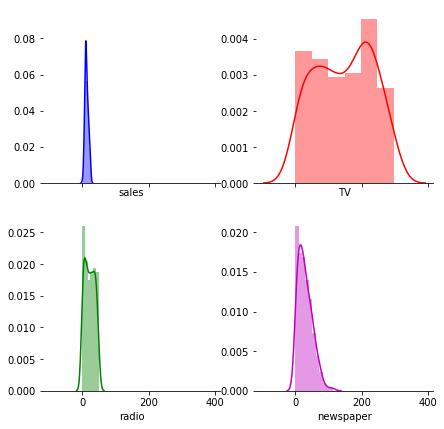

In [7]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True) 
sns.despine(left=True)

sns.distplot(data.sales, color="b", ax=axes[0, 0])
sns.distplot(data.TV, color="r", ax=axes[0, 1])
sns.distplot(data.radio, color="g", ax=axes[1, 0])
sns.distplot(data.newspaper, color="m", ax=axes[1, 1])

__Observations__<br/>
_Sales_ seems to be __normal distribution__. Spending on _newspaper advertisement_ seems to be __right skewed__. Most of the spends on _newspaper_ is __fairly low__ where are spend on _radio and tv_ seems be __uniform distribution__. Spends on _tv_ are __comparatively higher__ then spend on _radio and newspaper_.

### Is there a relationship between sales and spend various advertising channels?

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


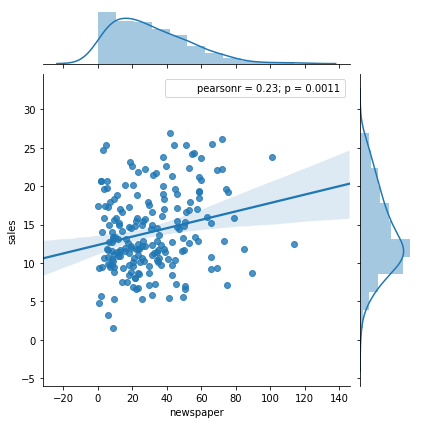

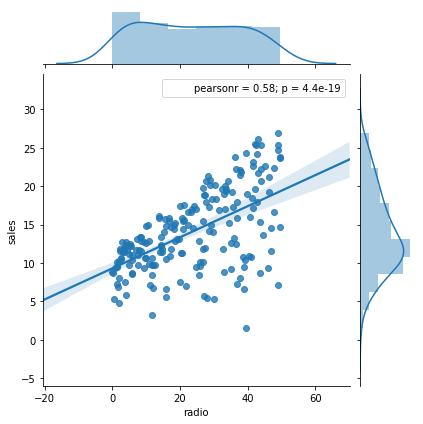

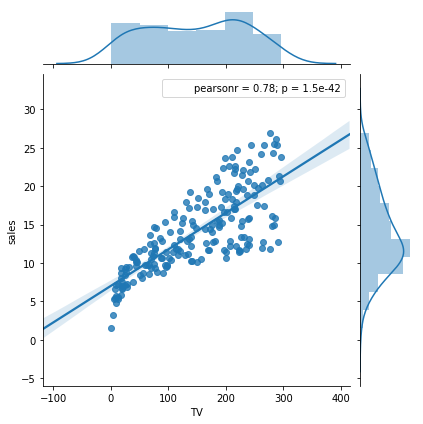

In [8]:
JG1 = sns.jointplot("newspaper", "sales", data=data, kind='reg')
JG2 = sns.jointplot("radio", "sales", data=data, kind='reg')
JG3 = sns.jointplot("TV", "sales", data=data, kind='reg')

# #subplots migration
# f = plt.figure()
# for J in [JG1, JG2,JG3]:
#     for A in J.fig.axes:
#         f._axstack.add(f._make_key(A), A)
        
# #assumption 1 is also fulfilled.

__Observation__<br/>
_Sales and spend on newpaper_ is __not__ highly correlaed where are _sales and spend on tv_ is __highly correlated__.

### Visualising Pairwise correlation

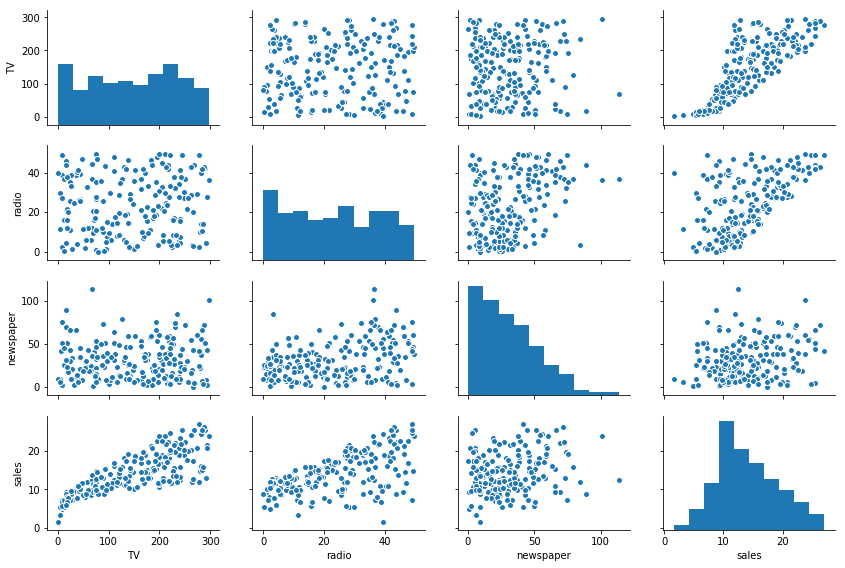

In [9]:
sns.pairplot(data, size = 2, aspect = 1.5)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


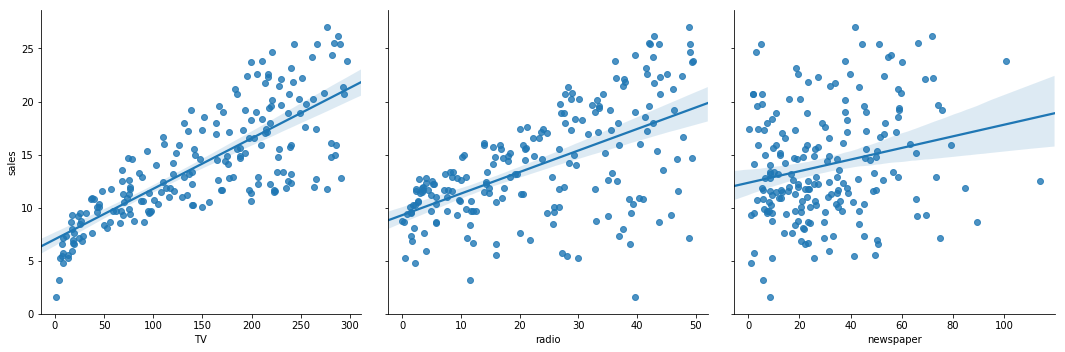

In [10]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=5, aspect=1, kind='reg')

__Observation__

- Strong relationship between TV ads and sales
- Weak relationship between Radio ads and sales
- Very weak to no relationship between Newspaper ads and sales



### Calculating and plotting heatmap correlation

In [11]:
data.corr()

#|r|<0.8 - ok range
#assumption no 3 fulfilled

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


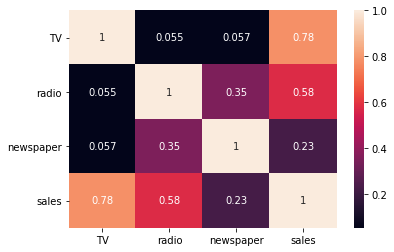

In [12]:
sns.heatmap( data.corr(), annot=True );

__Observation__

- The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. You can observe that the correlation between __TV and Sales is highest i.e. 0.78__ and then between __sales and radio i.e. 0.576__.

- correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with __strong correlations__ are mostly probably candidates for __model builing__.


In [13]:
#homosc. 

<a id=section4></a>

## 4. Introduction to Linear Regression

__Linear regression__ is a _basic_ and _commonly_ used type of __predictive analysis__.  The overall idea of regression is to examine two things: 
- Does a set of __predictor variables__ do a good job in predicting an __outcome__ (dependent) variable?  
- Which variables in particular are __significant predictors__ of the outcome variable, and in what way they do __impact__ the outcome variable?  

These regression estimates are used to explain the __relationship between one dependent variable and one or more independent variables__.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula :<br/>
$y = \beta_0 + \beta_1x$

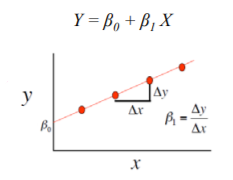

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x


Three major uses for __regression analysis__ are: 
- determining the __strength__ of predictors,
    - Typical questions are what is the strength of __relationship__ between _dose and effect_, _sales and marketing spending_, or _age and income_.
- __forecasting__ an effect, and
    - how much __additional sales income__ do I get for each additional $1000 spent on marketing?
- __trend__ forecasting.
    - what will the __price of house__ be in _6 months_?

<a id=section401></a>

### 4.1 Linear Regression Equation with Errors in consideration

While taking errors into consideration the equation of linear regression is: 
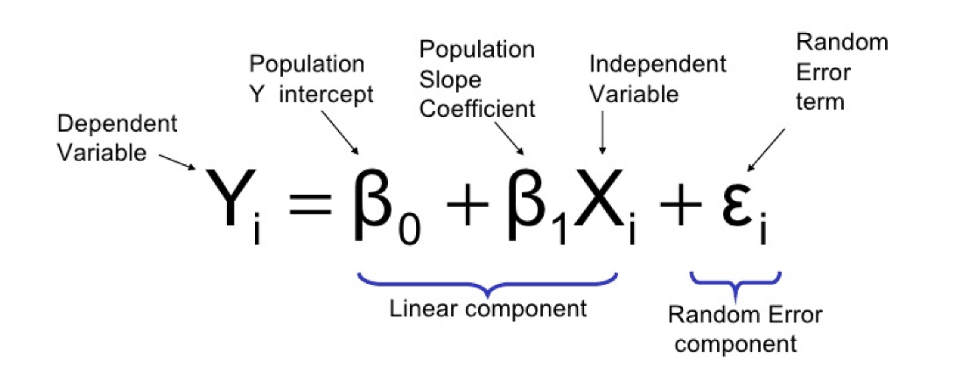
Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):


What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.
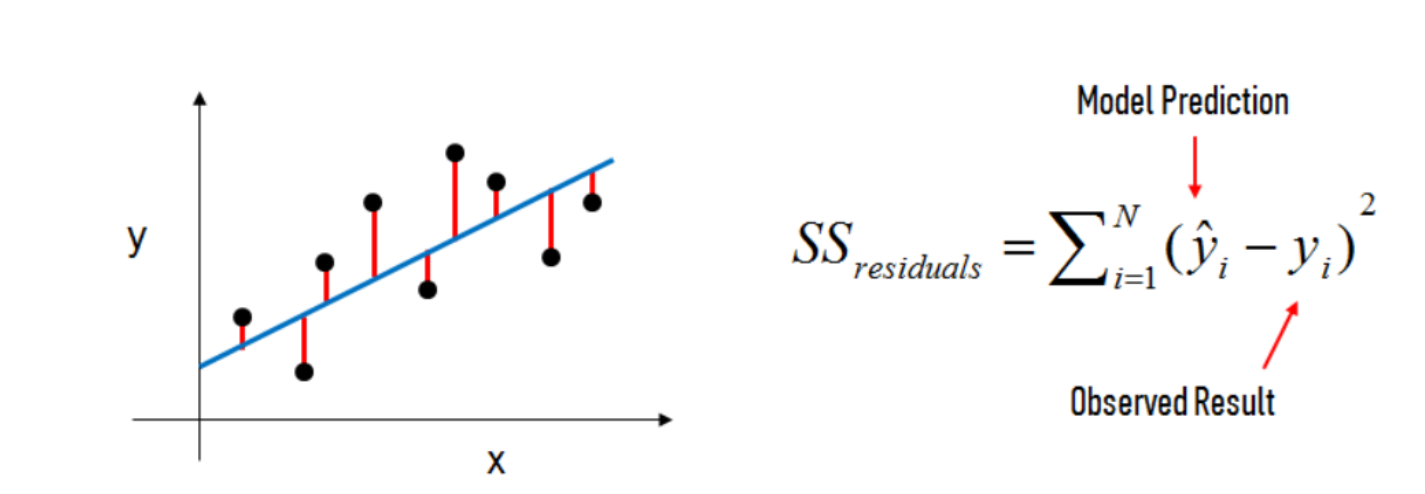


How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$ = 0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:
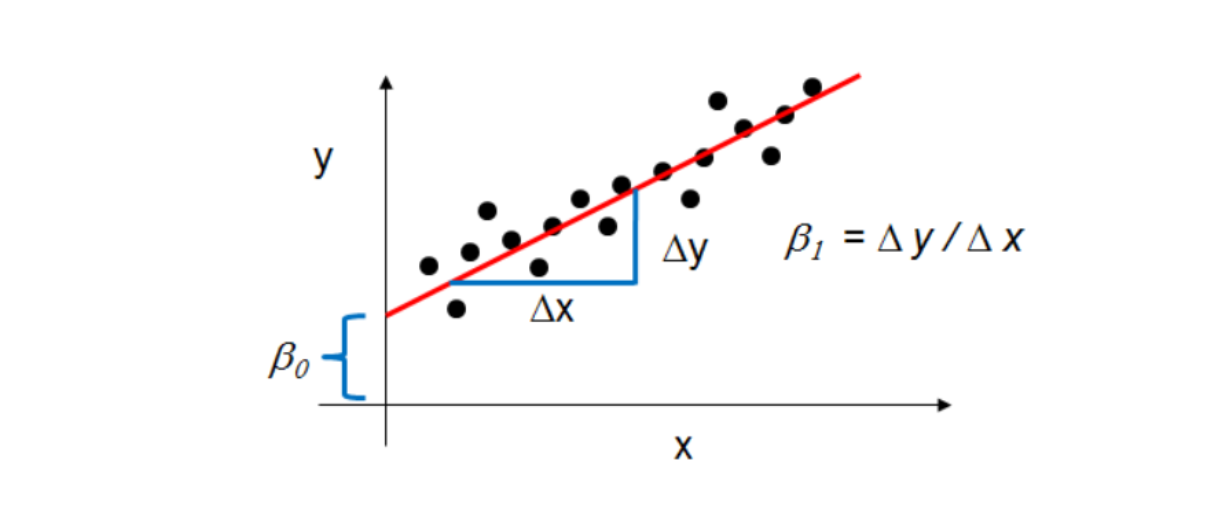

<a id = sectionassumptions></a>

#### 4.1.1 Assumptions of Linear Regression

1. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
2. There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
3. The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
4. The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
5. The error terms must be normally distributed.

<a id=section402></a>

### 4.2 Preparing X and y using pandas

- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

In [14]:
#object - comlicated variables, store a lor of info (type = class)

#int - single number (type = int)

#no of ep var =  3 - scaling? - no downside of scaling


In [15]:
feature_cols = ['TV', 'radio', 'newspaper']                # create a Python list of feature names
X = data[feature_cols] 
y = data.sales

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

#cross validation

In [17]:
X_test.shape

(40, 3)

In [18]:
type(y_train)

pandas.core.series.Series

In [19]:
# import the class
# create the object obj = class()
# obj.fit(Xtrain, ytrain)
# obj.tansform(Xtrain/test)

In [20]:
from sklearn.preprocessing import MinMaxScaler #import the class

scaler = MinMaxScaler() # cleate an object

scaler.fit(X_train) #use the created object on the available data #create the scaling factors

#fitting is determining what to do
#transforming - actually doing it


X_train_s = scaler.transform(X_train)

#mean =0 SD =1

In [21]:
X_train_s

array([[0.79003073, 0.1733871 , 0.09940828],
       [0.08330488, 0.51814516, 0.50887574],
       [0.25844998, 0.53830645, 0.26035503],
       [0.67224309, 0.07056452, 0.06627219],
       [0.81666098, 0.83669355, 0.21538462],
       [0.94230113, 0.04637097, 0.27692308],
       [0.03755548, 0.74395161, 0.53136095],
       [0.73301468, 0.47580645, 0.67810651],
       [0.238648  , 0.32258065, 0.47928994],
       [0.63878457, 0.42540323, 0.10887574],
       [0.76237624, 0.0483871 , 0.18106509],
       [0.75042677, 0.66935484, 0.44497041],
       [0.97405258, 0.28024194, 0.04023669],
       [0.93205872, 0.58266129, 0.70295858],
       [0.67975418, 0.0625    , 0.40591716],
       [0.46841926, 0.93548387, 0.69467456],
       [0.73062479, 0.48387097, 0.04378698],
       [0.69750768, 0.90927419, 0.22840237],
       [0.60191192, 0.6733871 , 0.45443787],
       [0.10515534, 0.49596774, 0.02248521],
       [0.12359167, 0.77822581, 0.77278107],
       [0.97951519, 0.86693548, 0.84615385],
       [0.

In [22]:
#test data mimics the dataset which will come tomorrow, 

X_test_s = scaler.transform(X_test)

In [23]:
X_train_s = pd.DataFrame(data = X_train_s, columns = feature_cols)
X_train_s

,TV,radio,newspaper
0,0.790031,0.173387,0.099408
1,0.083305,0.518145,0.508876
2,0.258450,0.538306,0.260355
3,0.672243,0.070565,0.066272
4,0.816661,0.836694,0.215385
5,0.942301,0.046371,0.276923
6,0.037555,0.743952,0.531361
7,0.733015,0.475806,0.678107
8,0.238648,0.322581,0.479290
9,0.638785,0.425403,0.108876


In [24]:
X_test_s = pd.DataFrame(data = X_test_s, columns = feature_cols)
X_test_s

,TV,radio,newspaper
0,0.509047,0.026210,0.284024
1,0.248208,0.342742,0.149112
2,0.340389,0.193548,0.039053
3,0.022533,0.566532,0.486391
4,0.679754,0.052419,0.247337
5,0.955958,0.280242,0.434320
6,0.162513,0.947581,0.097041
7,0.055309,0.881048,1.054438
8,0.889723,0.860887,0.643787
9,0.736429,0.840726,0.465089


In [25]:
#data = pd.DataFrame(data1)
#data.head()

In [26]:
#data.columns = ['TV','radio','newspaper','sales']
#data.head()

In [27]:
#feature_cols = ['TV', 'radio', 'newspaper']                # create a Python list of feature names
#X = data[feature_cols]                                     # use the list to select a subset of the original DataFrame-+

- Checking the type and shape of X.

In [28]:
#print(type(X))
#print(X.shape)

In [29]:
#y = data.sales
#y.head()

- Check the type and shape of y

In [30]:
#print(type(y))
#print(y.shape)

<a id=section403></a>

### 4.3 Splitting X and y into training and test datasets.

In [31]:
#from sklearn.model_selection import train_test_split

#train_test_split(X, y, test_size=0.20, random_state=1)

In [32]:
#X_train, X_test, y_train, y_test=split(X,y)
#print('Train cases as below')
#print('X_train shape: ',X_train.shape)
#print('y_train shape: ',y_train.shape)
#print('\nTest cases as below')
#print('X_test shape: ',X_test.shape)
#print('y_test shape: ',y_test.shape)

<a id=section404></a>

### 4.4 Linear regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating Root mean square error 
The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))```

In [33]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()

linreg.fit(X_train_s,y_train) #calculation of b0 and b1

y_pred_test = linreg.predict(X_test_s) 
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))  


y_pred_train = linreg.predict(X_train_s) 
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)) 


# import the class
# obj = class()
# obj.fit(train)
# y_pred = obj.predict(train and test)
# RMSE


In [35]:
RMSE_test

2.0329103340366075

In [36]:
y_pred_test

array([ 9.94276077,  9.45082094,  9.17945114,  8.81660588, 12.3993464 ,
       18.27191866, 14.02262923, 12.5516807 , 23.02176942, 20.72412798,
       13.7538388 , 14.63035243, 23.13796737,  7.6708417 , 10.9622783 ,
        7.70310131, 21.60530324, 14.1056781 , 23.96232158,  7.0672    ,
        8.17107003, 11.89458151, 17.20771622, 13.07822553,  8.09035145,
       14.87750134, 19.75464819, 16.65194385, 23.6858284 , 13.63770423,
       13.83649215, 23.34419246, 16.35367881,  6.50803431, 17.41709317,
       11.60417602, 12.26046438, 18.23854536,  9.65183662,  5.76113133])

<a id=section405></a>

### 4.5 Interpreting Model Coefficients

In [37]:
print('Intercept:',linreg.intercept_)  #b0                                         # print the intercept 
print('Coefficients:',linreg.coef_) #b1,b2,b3

Intercept: 2.878964269215574
Coefficients: [13.06370608  9.45987426  0.58378899]


In [38]:
SS_Residual = sum((y_test-y_pred_test)**2)

SS_Total = sum((y_test-np.mean(y_test))**2)

r_squared = 1 - (float(SS_Residual))/SS_Total

# adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(r_squared)


0.8725755533331085


In [39]:
X_test.shape[1]

3

In [40]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_test)
r2
# adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
# adjusted_r2

0.8725755533331085

Its hard to remember the order of the feature names, we so we are __zipping__ the features to pair the feature names with the coefficients

In [41]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_) #list creation

In [42]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 2.878964269215574
TV 13.063706081481117
radio 9.459874259927913
newspaper 0.5837889929894314


__y = 0.00116 + 0.7708 `*` TV + 0.508 `*` radio + 0.010 `*` newspaper__

How do we interpret the TV coefficient (_0.77081_)
- A "unit" increase in TV ad spending is **associated with** a _"0.7708_ unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 770.8 widgets.

Important Notes:
- This is a statement of __association__, not __causation__.
- If an increase in TV ad spending was associated with a __decrease__ in sales,  β1  would be __negative.__

<a id=section406></a>

### 4.6 Using the Model for Prediction

In [43]:
y_pred_train = linreg.predict(X_train_s)  

In [44]:
y_pred_test = linreg.predict(X_test_s)                                                           # make predictions on the testing set

In [45]:
y_pred_test

array([ 9.94276077,  9.45082094,  9.17945114,  8.81660588, 12.3993464 ,
       18.27191866, 14.02262923, 12.5516807 , 23.02176942, 20.72412798,
       13.7538388 , 14.63035243, 23.13796737,  7.6708417 , 10.9622783 ,
        7.70310131, 21.60530324, 14.1056781 , 23.96232158,  7.0672    ,
        8.17107003, 11.89458151, 17.20771622, 13.07822553,  8.09035145,
       14.87750134, 19.75464819, 16.65194385, 23.6858284 , 13.63770423,
       13.83649215, 23.34419246, 16.35367881,  6.50803431, 17.41709317,
       11.60417602, 12.26046438, 18.23854536,  9.65183662,  5.76113133])

- We need an evaluation metric in order to compare our predictions with the actual values.

<a id=section5></a>

## 5. Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
For example, if a model predicts that the price of apple is Rs75/kg, but the actual price of apple is Rs100/kg, then the error in prediction will be Rs25/kg.<br/>
Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

<a id=section501></a>

### 5.1 Model Evaluation using __metrics.__

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Sales predictions

In [46]:
#MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
#MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [47]:
#print('MAE for training set is {}'.format(MAE_train))
#print('MAE for test set is {}'.format(MAE_test))

__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Sales predictions

In [48]:
#MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
#MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [49]:
#print('MSE for training set is {}'.format(MSE_train))
#print('MSE for test set is {}'.format(MSE_test))

__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Sales predictions

In [50]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [51]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 1.5814952962451507
RMSE for test set is 2.0329103340366075


Comparing these metrics:

- __MAE__ is the easiest to understand, because it's the __average error.__ 
- __MSE__ is more popular than MAE, because MSE "punishes" larger errors.
- __RMSE__ is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.

<a id=section502></a>

### 5.2 Model Evaluation using Rsquared value.

- There is one more method to evaluate linear regression model and that is by using the __Rsquared__ value.<br/>
- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

In [52]:
#yhat = linreg.predict(X_train_s)
SS_Residual = sum((y_train-y_pred_train)**2) #unexplained variance
SS_Total = sum((y_train-np.mean(y_train))**2) #total variance

r_squared = 1 - (float(SS_Residual))/SS_Total #basic R2 formula

adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1) # AdjR2 = 1 - (1-R2)(N-1)/(N-p-1)
print(r_squared, adjusted_r_squared)

0.9028626568457456 0.9009946310158561


In [53]:
#yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-y_pred_test)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8725755533331085 0.8619568494442009


In [54]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.9028626568457456

<a id=section6></a>

## 6. Feature Selection

At times some features do not contribute much to the accuracy of the model, in that case its better to discard those features.<br/> 
- Let's check whether __"newspaper"__ improve the quality of our predictions or not.<br/> 
To check this we are going to take all the features other than "newspaper" and see if the error (RMSE) is reducing or not.
- Also Applying __Gridsearch__ method for exhaustive search over specified parameter values of  estimator.

In [55]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [56]:
feature_cols = ['TV','radio']                                                          # create a Python list of feature names
X = data[feature_cols]  
y = data.sales
linreg=linear_reg(X,y, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.8857920935307793
RMSE for the test set is 1.955221885011318


- _Before_ doing feature selection _RMSE_ for the test dataset was __0.271__.<br/>
- _After_ discarding 'newspaper' column, RMSE comes to be __0.072__.<br/>
As you can see there is __significant improvement__ in the quality, therefore, the 'newspaper' column should be discarded. But if in some other case if there is no significant decrease in the RMSE, then you must keep that feature.

<a id=section7></a>

## 7.  Handling Categorical Features

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban** :

In [57]:
np.random.seed(123456)                                                # set a seed for reproducibility
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)                         # assign roughly one third of observations to each group
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,radio,newspaper,sales,Area
1,230.1,37.8,69.2,22.1,rural
2,44.5,39.3,45.1,10.4,urban
3,17.2,45.9,69.3,9.3,rural
4,151.5,41.3,58.5,18.5,urban
5,180.8,10.8,58.4,12.9,suburban


In [58]:
#,is we had a categorical feature: encoding

We want to represent Area numerically, but we can't simply code it as:<br/>
- 0 = rural,<br/>
- 1 = suburban,<br/>
- 2 = urban<br/>
Because that would imply an **ordered relationship** between suburban and urban, and thus urban is somehow "twice" the suburban category.<br/> Note that if you do have ordered categories (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can use a single dummy variable to represent the categories numerically (such as 1, 2, 3, 4, 5).<br/>

Anyway, our Area feature is unordered, so we have to create **additional dummy variables**. Let's explore how to do this using pandas:

In [59]:
area_dummies = pd.get_dummies(data.Area, prefix='Area', drop_first = True)                           # create three dummy variables using get_dummies
area_dummies.head()

,Area_suburban,Area_urban
1,0,0
2,0,1
3,0,0
4,0,1
5,1,0


However, we actually only need **two dummy variables, not three**. 
__Why???__
Because two dummies captures all the "information" about the Area feature, and implicitly defines rural as the "baseline level".

Let's see what that looks like:

In [60]:
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]
area_dummies.head()

,Area_suburban,Area_urban
1,0,0
2,0,1
3,0,0
4,0,1
5,1,0


Here is how we interpret the coding:
- **rural** is coded as  Area_suburban = 0  and  Area_urban = 0
- **suburban** is coded as  Area_suburban = 1  and  Area_urban = 0
- **urban** is coded as  Area_suburban = 0  and  Area_urban = 1

If this sounds confusing, think in general terms that why we need only __k-1 dummy variables__ if we have a categorical feature with __k "levels"__.

Anyway, let's add these two new dummy variables onto the original DataFrame, and then include them in the linear regression model.

In [61]:
# concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,radio,newspaper,sales,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,rural,0,0
2,44.5,39.3,45.1,10.4,urban,0,1
3,17.2,45.9,69.3,9.3,rural,0,0
4,151.5,41.3,58.5,18.5,urban,0,1
5,180.8,10.8,58.4,12.9,suburban,1,0


In [62]:
feature_cols = ['TV', 'radio', 'newspaper', 'Area_suburban', 'Area_urban']             # create a Python list of feature names
X = data[feature_cols]  
y = data.sales

linreg = LinearRegression()

#scaling of cont variables
#train test split

linreg.fit(X, y) #determining the beta values

#predict
y_pred = linreg.predict(X) #predicted y


In [63]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 2.9201242206744347
TV 0.0458022975267515
radio 0.1876168226007383
newspaper -0.0010181488261778579
Area_suburban -0.11789029564150823
Area_urban 0.25352196444399694


__y = - 0.00218 + 0.7691 `*` TV + 0.505 `*` radio + 0.011 `*` newspaper - 0.0311 `*` Area_suburban + 0.0418 `*` Area_urban__<br/>
How do we interpret the coefficients?<br/>
- Holding all other variables fixed, being a **suburban** area is associated with an average **decrease** in Sales of 0.0311 widgets (as compared to the baseline level, which is rural).
- Being an **urban** area is associated with an average **increase** in Sales of 0.0418 widgets (as compared to rural).